In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1_l2

In [14]:
import os
from PIL import Image

def convert_images_to_jpeg(directory):
    """
    Recursively converts all images in the given directory and its subdirectories to JPEG format.
    
    Args:
    directory (str): Path to the directory containing images.
    """
    supported_formats = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')
    
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(supported_formats):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        rgb_img = img.convert('RGB')  # Convert to RGB
                        # Save the image in JPEG format
                        jpeg_path = os.path.splitext(file_path)[0] + '.jpeg'
                        rgb_img.save(jpeg_path, 'JPEG')
                        print(f"Converted {file_path} to {jpeg_path}")
                        # Optionally remove the original file if needed
                        os.remove(file_path)
                except Exception as e:
                    print(f"Failed to convert {file_path}: {e}")

# Example usage
directory_path = '/Users/leonardo/Library/CloudStorage/GoogleDrive-leonardofonseca.r@gmail.com/My Drive/04_projects/CryptoVision/Data/training_v2/test'
convert_images_to_jpeg(directory_path)

Converted /Users/leonardo/Library/CloudStorage/GoogleDrive-leonardofonseca.r@gmail.com/My Drive/04_projects/CryptoVision/Data/training_v2/test/Labridae_Halichoeres_claudia/98795_web_Halichoeres_claudia_80.jpeg to /Users/leonardo/Library/CloudStorage/GoogleDrive-leonardofonseca.r@gmail.com/My Drive/04_projects/CryptoVision/Data/training_v2/test/Labridae_Halichoeres_claudia/98795_web_Halichoeres_claudia_80.jpeg
Converted /Users/leonardo/Library/CloudStorage/GoogleDrive-leonardofonseca.r@gmail.com/My Drive/04_projects/CryptoVision/Data/training_v2/test/Labridae_Halichoeres_claudia/97518_web_Halichoeres_claudia_26.jpeg to /Users/leonardo/Library/CloudStorage/GoogleDrive-leonardofonseca.r@gmail.com/My Drive/04_projects/CryptoVision/Data/training_v2/test/Labridae_Halichoeres_claudia/97518_web_Halichoeres_claudia_26.jpeg
Converted /Users/leonardo/Library/CloudStorage/GoogleDrive-leonardofonseca.r@gmail.com/My Drive/04_projects/CryptoVision/Data/training_v2/test/Labridae_Halichoeres_claudia/98

In [15]:
import pathlib

train_dir = "/Users/leonardo/Library/CloudStorage/GoogleDrive-leonardofonseca.r@gmail.com/My Drive/04_projects/CryptoVision/Data/training_v2/train"
test_dir = "/Users/leonardo/Library/CloudStorage/GoogleDrive-leonardofonseca.r@gmail.com/My Drive/04_projects/CryptoVision/Data/training_v2/test"
train_dir = pathlib.Path(train_dir)
test_dir = pathlib.Path(test_dir)

In [16]:
batch_size = 32
img_height = 224
img_width = 224

In [64]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode="categorical",
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode="categorical",
  )

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode="categorical",
)

Found 5304 files belonging to 57 classes.
Using 4244 files for training.
Found 5304 files belonging to 57 classes.
Using 1060 files for validation.
Found 1354 files belonging to 57 classes.


In [18]:
class_names = train_ds.class_names
print(class_names)

['Apogonidae_Apogon_binotatus', 'Apogonidae_Apogon_maculatus', 'Apogonidae_Fowleria_vaiulae', 'Apogonidae_Ostorhinchus_angustatus', 'Apogonidae_Pristiapogon_kallopterus', 'Blenniidae_Cirripectes_variolosus', 'Blenniidae_Ecsenius_pulcher', 'Blenniidae_Ecsenius_stictus', 'Blenniidae_Enchelyurus_ater', 'Chaenopsidae_Acanthemblemaria_aspera', 'Chaetodontidae_Chaetodon_quadrimaculatus', 'Cirrhitidae_Neocirrhites_armatus', 'Cirrhitidae_Paracirrhites_arcatus', 'Creediidae_Limnichthys_nitidus', 'Gobiidae_Aioliops_megastigma', 'Gobiidae_Eviota_albolineata', 'Gobiidae_Eviota_atriventris', 'Gobiidae_Eviota_melasma', 'Gobiidae_Fusigobius_neophytus', 'Gobiidae_Gobiodon_histrio', 'Gobiidae_Gobiodon_quinquestrigatus', 'Gobiidae_Istigobius_decoratus', 'Gobiidae_Koumansetta_rainfordi', 'Gobiidae_Nemateleotris_magnifica', 'Gobiidae_Paragobiodon_lacunicolus', 'Gobiidae_Paragobiodon_modestus', 'Gobiidae_Pleurosicya_labiata', 'Gobiidae_Priolepis_semidoliatus', 'Gobiidae_Trimma_macrophthalmus', 'Labridae_Go

TypeError: only integer scalar arrays can be converted to a scalar index

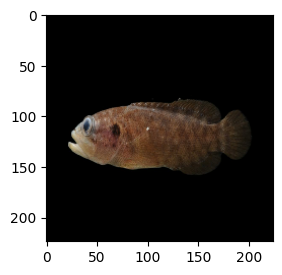

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
#image_batch, labels_batch = next(iter(normalized_ds))
#first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
#print(np.min(first_image), np.max(first_image))

In [22]:
pre_trained_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False, 
    weights='imagenet', 
    pooling='avg',
    input_shape=(224, 224, 3)
)

for layer in pre_trained_model.layers[:-10]:
        layer.trainable = False

input_model = pre_trained_model.input
x = pre_trained_model.output

x = tf.keras.layers.Dense(
    1024,
    activation="relu",
    kernel_regularizer=l1_l2(l1=0.001, l2=0.001),
)(x)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)

output = tf.keras.layers.Dense(
    len(class_names), activation="softmax"
)(x)

model = tf.keras.models.Model(inputs=input_model, outputs=output)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=['accuracy','AUC', 'Precision', 'Recall'],
)

In [23]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          0 │ rescaling_3[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ normalization_1[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 112, 112,  │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 56, 56,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 56, 56,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 56, 56,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 56, 56,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 56, 56,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 56, 56,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 56, 56,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 56, 56,    │          0 │ block2b_expand_b

 Total params: 7,293,577 (27.82 MB)

 Trainable params: 1,898,553 (7.24 MB)

 Non-trainable params: 5,395,024 (20.58 MB)

In [24]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 32s 165ms/step - AUC: 0.7764 - Precision: 0.6316 - Recall: 0.1441 - accuracy: 0.2742 - loss: 37.3672 - val_AUC: 0.9854 - val_Precision: 1.0000 - val_Recall: 0.0132 - val_accuracy: 0.7915 - val_loss: 34.5647
Epoch 2/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - AUC: 0.9906 - Precision: 0.9380 - Recall: 0.6858 - accuracy: 0.8215 - loss: 32.5459 - val_AUC: 0.9946 - val_Precision: 0.9908 - val_Recall: 0.5085 - val_accuracy: 0.8604 - val_loss: 30.7829
Epoch 3/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - AUC: 0.9975 - Precision: 0.9660 - Recall: 0.8368 - accuracy: 0.9054 - loss: 29.5012 - val_AUC: 0.9960 - val_Precision: 0.9812 - val_Recall: 0.7877 - val_accuracy: 0.8972 - val_loss: 27.4698
Epoch 4/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 16s 117ms/step - AUC: 0.9993 - Precision: 0.9866 - Recall: 0.9135 - accuracy: 0.9541 - loss: 26.4286 - val_AUC: 0.9962 - val_Precision: 0.9707 - val_Recall: 0.8434 - val_accuracy: 0.9085 - val_loss: 24.3285
Epoch 5/10
1

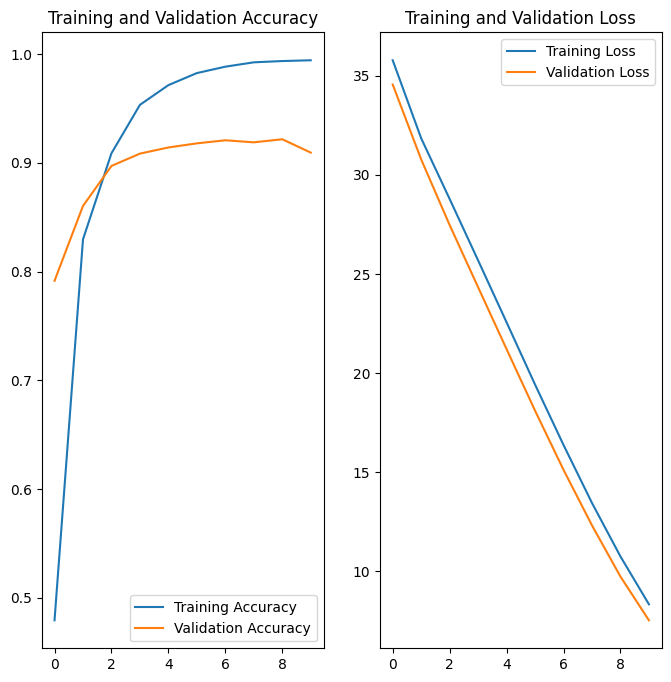

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [62]:
img = tf.keras.utils.load_img(
    "/Users/leonardo/Library/CloudStorage/GoogleDrive-leonardofonseca.r@gmail.com/My Drive/04_projects/CryptoVision/Data/training_v2/test/Apogonidae_Ostorhinchus_angustatus/42399_web_Ostorhinchus_angustatus_3.jpeg",
    target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(predictions[0]))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
This image most likely belongs to Apogonidae_Ostorhinchus_angustatus with a 64.26 percent confidence.


In [63]:
# Get the top 5 predictions and their confidence scores
top_5_indices = np.argsort(predictions[0])[-5:][::-1]
top_5_confidences = predictions[0][top_5_indices]
top_5_classes = [class_names[i] for i in top_5_indices]

# Print the top 5 predictions and their confidence scores
print("Top 5 predictions with confidence:")
for i, (cls, confidence) in enumerate(zip(top_5_classes, top_5_confidences)):
    print(f"{i + 1}. {cls} with a confidence of {100 * confidence:.2f}%")

Top 5 predictions with confidence:
1. Apogonidae_Ostorhinchus_angustatus with a confidence of 64.26%
2. Tripterygiidae_Helcogramma_fuscopinna with a confidence of 9.97%
3. Apogonidae_Apogon_maculatus with a confidence of 5.44%
4. Apogonidae_Fowleria_vaiulae with a confidence of 3.15%
5. Serranidae_Pseudogramma_polyacantha with a confidence of 2.30%


In [58]:
# Model evaluation
pred = model.predict(test_ds)
pred = np.argmax(pred, axis=1)



43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step
